<a href="https://colab.research.google.com/github/gregorywmorris/guided_projects/blob/main/time_series/introduction_to_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Book: [Introduction to Time Series Forecasting with Python](https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/)

Author: Jason Brownlee


# Chapter 5 Basic Feature Engineering

[data set](https://github.com/jbrownlee/Datasets/blob/master/daily-min-temperatures.csv)

In [1]:
import pandas as pd
import numpy as np
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [2]:
# create date time features of a dataset
dataframe = pd.DataFrame()
#dataframe.assign('month','day','temperature')
dataframe['date'] = [series.index[i] for i in range(len(series))]
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]
print(dataframe.head())

        date  month  day  temperature
0 1981-01-01      1    1         20.7
1 1981-01-02      1    2         17.9
2 1981-01-03      1    3         18.8
3 1981-01-04      1    4         14.6
4 1981-01-05      1    5         15.8


You may enumerate all the
properties of a time-stamp and consider what might be useful for your problem, such as:
* Minutes elapsed for the day.
* Hour of day.
* Business hours or not.
Weekend or not.
* Season of the year.
* Business quarter of the year.
* Daylight savings or not.
* Public holiday or not.
* Leap year or not.

In [3]:
# create a lag feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [4]:
# create lag features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))


    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


A difficulty with the sliding window approach is how large to make
the window for your problem. Perhaps a good starting point is to perform a sensitivity analysis
and try a suite of different window widths to in turn create a suite of different views of your
dataset and see which results in better performing models. There will be a point of diminishing
returns.

Additionally, why stop with a linear window? Perhaps you need a lag value from last week,
last month, and last year. Again, this comes down to the specific domain. In the case of the
temperature dataset, a lag value from the same day in the previous year or previous few years
may be useful.

In [5]:
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
temps.dtypes

0    float64
dtype: object

In [6]:
# create a rolling mean feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [10]:
# create rolling statistics features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head())

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


In [11]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))


    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


[Rolling vs Expanding](https://medium.com/@philippetousignant/forecasting-with-python-expanding-and-rolling-window-fa0be5545940#:~:text=Expanding%20window%20refers%20to%20a,of%20data%20in%20our%20model.)



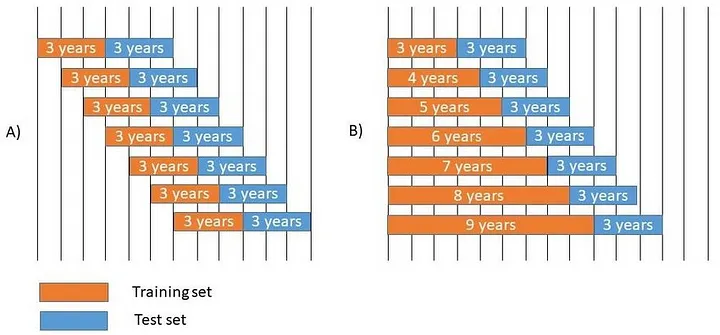

# Chapter 6 Data Visualization